# Importing libraries

In [2]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import joblib

# Data importing

In [ ]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
responses

{'greeting': ["Hi. Welcome to the world's largest pirate organization - The Strawhats",
  'Hey yo, do you need help ?',
  'welcome aboard, how may I help you ?',
  'ahoy!!',
  "Hi random person, what do'ya want ?",
  'Hello my friend, How can I help you ?',
  'Ha , Glad you showed up. How are you ?'],
 'goodbye': ['Okay, Bye',
  'Have a nice day',
  'Adios',
  'Goodbye',
  'see you later',
  'nice conversation. bye',
  'okay. Have a nice day',
  'Take care',
  "we'll meet soon",
  'Yeah Sure, Will talk to you later',
  'Okay , Take care'],
 'howami': ['Yeah , am fine',
  "Everything's going on well",
  'Doing good.Thanks you are my best friend',
  'Things are Great',
  'Yeah Fine, nothing much going on in my life',
  "I am Great , wanna join the pirate's organization ?",
  "Everything's great.",
  'I am doing good. Life is boring. need to go on an adventure'],
 'whoareyou': ['I am a The Great Pirate Bot , you can call me Going Merry',
  'I am Going Merry and you could ask me questions 

In [ ]:
res1 = pd.read_csv('responses.csv')
res2 = res1.to_dict()


In [ ]:
res1

,greeting,"[""Hi. How can I assist you today with your COVID-19 concerns?"",""Hi! I am here to help you navigate COVID-19. What can I do for you?"",""Greetings! As a COVID-19 checker, I am here to provide you with the information and resources you need to stay safe and healthy."",""Good to see you! Let me know how I can help you with the COVID-19."",""Hi, how can I help you today? I am here to support you with all of your COVID-19 related needs."",""Hello! Are you tested positive or shown any symptoms of COVID?"",""Hello! Are you currently having COVID or did you recover from COVID?"",""Hello! Could you specify the condition you are facing?""]"
0,goodbye,"[""Okay, Bye"",""Have a nice day"",""Goodbye"",""see ..."
1,covid_intro,"[""Coronaviruses are a large family of viruses ..."
2,positive,"[""Ohh, don't worry, I can assist you"",""Can you..."
3,symptoms,"[""The most common symptoms of COVID-19 are fev..."
4,treatments,"[""Some people become infected but don’t develo..."
5,recovered,"[""According to the information from the World ..."
6,prevention,"[""COVID-19 vaccines are effective to protect p..."
7,emergency,"[""If you develop fever, cough and difficulty b..."
8,children,"[""Respiratory infections are common in childre..."


In [3]:
res3 = {
    'greeting': ['Hi. How can I assist you today with your COVID-19 concerns?','Hi! I am here to help you navigate COVID-19. What can I do for you?','Greetings! As a COVID-19 checker, I am here to provide you with the information and resources you need to stay safe and healthy.','Good to see you! Let me know how I can help you with the COVID-19.','Hi, how can I help you today? I am here to support you with all of your COVID-19 related needs.','Hello! Are you tested positive or shown any symptoms of COVID?','Hello! Are you currently having COVID or did you recover from COVID?','Hello! Could you specify the condition you are facing?'],
    'goodbye': ['Okay, Bye','Have a nice day','Goodbye','see you later','nice conversation. bye','okay. Have a nice day','Take care','Yeah Sure, Will talk to you later','Okay , Take care'],
    'covid_intro': ['Coronaviruses are a large family of viruses which may cause illness in animals or humans. COVID-19 is the infectious disease caused by the most recently discovered coronavirus. COVID-19 were unknown before the outbreak began in Wuhan, China, in December 2019. The disease can spread from person to person through small droplets from the nose or mouth which are spread when a person with COVID-19 coughs or exhales. The symptoms of COVID-19 are very similar to symptoms of other illnesses, such as colds and flu. Most people feel better within a few days or weeks of their first COVID-19 symptoms and make a full recovery within 12 weeks. For some people, it can be a more serious illness and their symptoms can last longer.','The symptoms of COVID-19 are very similar to symptoms of other illnesses, such as colds and flu. Most people feel better within a few days or weeks of their first COVID-19 symptoms and make a full recovery within 12 weeks. For some people, it can be a more serious illness and their symptoms can last longer. While we are still learning about how COVID-2019 affects people, older persons and persons with pre-existing medical conditions (such as high blood pressure, heart disease, lung disease, cancer or diabetes) appear to develop serious illness more often than others.','Mode of transmission includes through respiratory droplets, contact of contaminated surfaces or objects, short-range aerosol or short-range airborne transmission. The virus can also spread in poorly ventilated and/or crowded indoor settings. Most estimates of the incubation period range from 1 to 14 days, and some variants, such as the Omicron variant, may have even shorter incubation period of around 3 days.'],
    'positive': ['Ohh, dont worry, I can assist you','Can you please share details why you think that','What kind of symptoms did you experience?','You may be able to look after yourself at home if you have COVID-19 or symptoms of COVID-19. Try to stay at home and avoid contact with other people if you or your child have symptoms.','You can go back to your normal activities when you feel better or do not have a high temperature. If your child has mild symptoms such as a runny nose, sore throat or mild cough, and they feel well enough, they can go to school or childcare.','You should avoid meeting people who are more likely to get seriously ill from viruses, such as people with a weakened immune system, for a further 10 days after your positive test','Try to stay at home and avoid contact with other people, until you no longer have a high temperature (if you had one) or until you no longer feel unwell.','It is particularly important to avoid close contact with anyone who you know is at higher risk of becoming seriously unwell if they are infected with COVID-19 and other respiratory infections, especially those whose immune system means that they are at higher risk of serious illness, despite vaccination.','Try to work from home if you can. If you are unable to work from home, talk to your employer about options available to you.','If you leave your home while you have symptoms of a respiratory infection, and you have a high temperature or feel unwell, avoid close contact with anyone who you know is at higher risk of becoming seriously unwell, especially those whose immune system means that they are at higher risk of serious illness, despite vaccination.','If you have a positive COVID-19 test result, it is very likely that you have COVID-19 even if you do not have any symptoms. You can pass on the infection to others, even if you have no symptoms.Many people with COVID-19 will no longer be infectious to others after 5 days. If you have a positive COVID-19 test result, try to stay at home and avoid contact with other people for 5 days after the day you took your test.','If you have COVID-19, there is a high risk that others in your household will catch it from you. There are several things you can do to reduce the spread of infection in your household. 1. Limit close contact with others. Spend as little time as possible in communal areas. 2. Regularly clean frequently touched surfaces and shared rooms like kitchens and bathrooms. 3. Wash your hands regularly using soap and water, particularly after coughing and sneezing. 4. Get help where possible from those you live with. Ask for help with cleaning and being. 5. brought food safely to avoid unnecessary contact. 6. Use a face covering if you need to spend time in shared spaces. 7. Keep rooms well ventilated. 8. Catch coughs and sneezes in disposable tissues and put them straight in the bin.','In line with the Governments latest measures, the Hospital Authoritys (HA) General Out-patient Clinics (GOPCs) help provide treatment for persons infected with COVID-19. Suitable infected persons will be prescribed with antiviral oral drugs and receive other relevant treatments.'],
    'symptoms': ['The most common symptoms of COVID-19 are fever, tiredness, and dry cough. Some patients may have aches and pains, nasal congestion, runny nose, sore throat or diarrhea. These symptoms are usually mild and begin gradually.','The most common symptoms of COVID-19 include fever, dry cough and fatigue. Other symptoms include loss of taste or smell, nasal congestion, conjunctivitis, sore throat, headache, muscle or joint pain, skin rash, nausea or vomiting, diarrhea, chills or dizziness. Some people may only have very mild or non-specific symptoms, while some may develop severe symptoms like shortness of breath, chest pain or confusion. Complications may include respiratory failure, acute respiratory distress syndrome (ARDS), sepsis and septic shock, thromboembolism, and/or multi-organ failure including injury of the heart, liver or kidneys. There are reports that children and adolescents with COVID-19 may develop a rare but serious condition known as multisystem inflammatory syndrome in children (MIS-C), leading to multiorgan failure and shock. People of older age and those having underlying medical problems (e.g. hypertension, heart and lung problems, diabetes, obesity or cancer) are at higher risk of developing serious illness.','Around 1 out of every 6 people who gets COVID-19 becomes seriously ill and develops difficulty breathing. Older people, and those with underlying medical problems like high blood pressure, heart problems or diabetes, are more likely to develop serious illness. People with fever, cough and difficulty breathing should seek medical attention. In some cases, you might continue to have a cough or feel tired after your other symptoms have improved, but this does not mean that you are still infectious.'],
    'treatments': ['Some people become infected but dont develop any symptoms and dont feel unwell. Most people (about 80%) recover from the disease without needing special treatment. You should get plenty of rest and drink water to keep hydrated. You can use medications such as paracetamol to help with your symptoms. Antibiotics are not recommended for viral respiratory infections because they will not relieve your symptoms or speed up your recovery.','Treatment includes supportive therapy, symptomatic treatment, antiviral agents, and Chinese medicine.','In line with the Government’s latest measures, the Hospital Authoritys (HA) General Out-patient Clinics (GOPCs) help provide treatment for persons infected with COVID-19. Suitable infected persons will be prescribed antiviral oral drugs and receive other relevant treatments.  HA support hotline 1836 115 will provide assistance for infected persons. Patients with mild symptoms or lower risk could also consult private doctors. Patients who require COVID-19 oral drugs can refer to the following hyperlink to consult the relevant private doctors: www.coronavirus.gov.hk/pdf/tp_pd_antiviral.pdf.'],
    'recovered': ['According to the information from the World Health Organization (WHO), approximately 10-20% of people may continue to experience mid- and long-term effects of COVID-19, which are collectively known as Post COVID-19 condition, or Long COVID. Common symptoms of long COVID include fatigue, shortness of breath, cognitive dysfunction, headache, pain (e.g. chest pain, joint pain) and may have an impact on everyday functioning. There may be multi-organ effects or autoimmune conditions particularly in children. Symptoms may be new onset following initial recovery from an acute COVID-19 episode or persist from the initial illness. Symptoms may also fluctuate (change from time to time) or relapse (return of symptoms after period of improvement) over time. Although it is still unclear how long the symptoms may last, current research suggests that patients can improve with time. Some studies reported that long COVID is found more often in people who had severe COVID-19 illness, but anyone (including those with mild illness) can experience this condition after infected with COVID-19. According to WHO, COVID-19 vaccination can reduce incidence of long COVID. Some studies also suggested vaccinated persons are less likely to develop long COVID even they get infected, compared to the unvaccinated.','Post COVID-19 condition occurs in individuals with a history of probable or confirmed SARS- CoV-2 infection, usually 3 months from the onset of COVID-19 with symptoms that last for at least 2 months and cannot be explained by an alternative diagnosis. Common symptoms include fatigue, shortness of breath, cognitive dysfunction but also others which generally have an impact on everyday functioning. Symptoms may be new onset, following initial recovery from an acute COVID-19 episode or persist from the initial illness. Symptoms may also fluctuate or relapse over time.','Studies show that around 10–20% of people infected by SARS-CoV-2 may go on to develop symptoms that can be diagnosed as long COVID. Although exact numbers of those living with the condition are uncertain, it is believed that more than 17 million people across the WHO European Region may have experienced it during the first two years of the pandemic (2020/21). While common symptoms of long COVID can include fatigue, shortness of breath and cognitive dysfunction over 200 different symptoms have been reported that can have an impact on everyday functioning.','Post COVID-19 condition, also known as long COVID, can arise irrespective of the severity of the COVID-19 infection, the circulating variant of the virus, or the person’s age. Evidence shows that it usually arises 3 months from the onset of COVID-19, with symptoms lasting at least 2 months. Long COVID affects all age groups, and symptoms can emerge in people who were previously fit and healthy. WHO has also received reports of the condition occurring more frequently in women than men. The condition can be debilitating, causing disabling symptoms and functional deficits. It can significantly impact peoples ability to work, engage and participate fully in family and community life. Mental health effects can directly result from long COVID, but may also develop due to prolonged suffering and distress caused by the condition.','Post COVID-19 condition occurs in individuals with a history of probable or confirmed SARS-CoV-2 infection, usually 3 months from the onset of COVID-19 with symptoms that last for at least 2 months, that cannot be explained by an alternative diagnosis. Common symptoms include fatigue, shortness of breath, cough, cognitive dysfunction, sleep disturbances but also others which generally have an impact on everyday functioning. Symptoms may be new onset, following initial recovery from an acute COVID-19 episode, or persist from the initial illness. Symptoms may also fluctuate or relapse over time.','The most common symptoms of long COVID are extreme tiredness (fatigue), feeling short of breath, loss of smell, muscle aches. However, there are lots of symptoms you can have after a COVID-19 infection, including problems with your memory and concentration (brain fog), chest pain or tightness, difficulty sleeping (insomnia), heart palpitations, dizziness, pins and needles, joint pain, depression and anxiety, tinnitus, earaches, feeling sick, diarrhoea, stomach aches, loss of appetite, a high temperature, cough, headaches, sore throat, changes to sense of smell or taste and rashes.','Recovery from long COVID varies. Some symptoms can improve quickly and others last longer. The chances of having long-term symptoms does not seem to be linked to how ill you are when you first get COVID-19. People who had mild symptoms at first can still have long-term problems.','Seek medical care for post-COVID conditions if you have a fever over 100.4 F, if you cannot take care of your symptoms at home, and/or if you are not recovering from your initial COVID-19 illness. In general, its important to talk to a medical provider when your symptoms make your daily life harder, for example, if you cant focus, sleep, or do your normal activities. Since many symptoms of post-COVID conditions are like symptoms of other diseases, it is also important to see a medical provider to rule out other illnesses.'],
    'prevention': ['COVID-19 vaccines are effective to protect people against COVID-19 disease, in particular severe illness and death. Vaccination is one of the most effective tools in the overall public health response to COVID-19. The combination of non-pharmaceutical interventions (NPIs) with vaccination will allow for maximum protection against the virus. With COVID-19 vaccines deployed, there is a need to continue NPIs, including good hand hygiene and wearing a mask in public, to reduce the risk of virus transmission. NPIs should continue to be followed by vaccinated individuals, as well as those who have not yet been vaccinated. For details on COVID-19 vaccination, please refer to thematic website for COVID-19 Vaccination Programme: www.covidvaccine.gov.hk','Regularly and thoroughly clean your hands with an alcohol-based hand rub or wash them with soap and water. Maintain at least 1 metre (3 feet) distance between yourself and anyone who is coughing or sneezing.','Regularly and thoroughly clean your hands with an alcohol-based hand rub or wash them with soap and water. Maintain at least 1 metre (3 feet) distance between yourself and anyone who is coughing or sneezing.','The wearing of mask is advised for the following situations - (a) any persons with fever or respiratory symptoms;n(b) any persons who are visiting or working in high risk places such as residential care homes for the elderly, residential care homes for persons with disabilities, and clinical areas of healthcare facilities; and (c) high risk persons (e.g. persons with underlying medical conditions or persons who are immunocompromised) who are going to crowded places such as public transport.','Avoid touching your eyes, mouth and nose before washing hands; Perform hand hygiene frequently, especially before touching ones mouth, nose or eyes; before eating; after using the toilet; after touching public installations such as handrails or door knobs; or when hands are contaminated by respiratory secretions after coughing or sneezing; Cover your mouth and nose with tissue paper when sneezing or coughing. Dispose of soiled tissues into a lidded rubbish bin, then wash hands thoroughly; Wash hands with liquid soap and water, and rub for at least 20 seconds. Then rinse with water and dry with a disposable paper towel. When the hands are cleaned, do not touch the water tap directly again (for example, using a paper towel to wrap the faucet before turn it off). If hand washing facilities are not available, or when hands are not visibly soiled, performing hand hygiene with 70 to 80% alcohol-based handrub is an effective alternative; After using the toilet, put the toilet lid down before flushing to avoid spreading germs; Maintain good indoor ventilation.'],
    'emergency': ['If you develop fever, cough and difficulty breathing, seek medical advice promptly as this may be due to a respiratory infection or other serious condition. You may get professional advice from the following hotlines: Hospital Authority Enquiry Hotline: 1836 115 (9:00 am to 5:00 pm (Mon - Fri), 9:00 am to 1:00 pm (Sat), closed on Sunday and public holidays); Centre for Health Protection Hotline: 183 0111 (9 am to 8 pm)'],
    'children': ['Respiratory infections are common in children and young people, particularly during the winter months. Symptoms can be caused by several respiratory infections including the common cold, COVID-19 and RSV. For most children and young people, these illnesses will not be serious, and they will soon recover following rest and plenty of fluids.nVery few children and young people with respiratory infections become seriously unwell. This is also true for children and young people with long-term conditions. Some children under 2, especially those born prematurely or with a heart condition, can be more seriously unwell from RSV. If your child has mild symptoms such as a runny nose, sore throat or mild cough, and they feel well enough, they can go to school or childcare.','Children and young people with mild symptoms such as a runny nose, sore throat, or slight cough, who are otherwise well, can continue to attend their education setting. Children and young people who are unwell and have a high temperature should stay at home and avoid contact with other people, where they can. They can go back to school, college or childcare, and resume normal activities when they no longer have a high temperature and they are well enough to attend.','All children and young people with respiratory symptoms should be encouraged to cover their mouth and nose with a disposable tissue when coughing and/or sneezing and to wash their hands after using or disposing of tissues.nIt can be difficult to know when to seek help if your child is unwell. If you are worried about your child, especially if they are aged under 2 years old, then you should seek medical help.','To avoid severe illness and sequelae of COVID-19 in children, parents should bring their children for COVID-19 vaccination as soon as possible. The two COVID-19 vaccines currently being used in Hong Kong are safe and effective as supported by clinical data. Expert recommendations of the Joint Scientific Committee and the Expert Advisory Panel are as follows: a) Children from 6 months to 4 years old can be vaccinated with the Sinovac vaccine, b) Children and adolescents between 5 and 17 years old can be vaccinated with the BioNtech vaccine or Sinovac vaccine.nThe first and second doses of Sinovac vaccine are separated by one month, and the second and third doses are separated by at least three months. The first and second doses of BioNTech vaccine are separated by two months, and the second and third doses are at least five months apart. The Hong Kong Department of Health and the Hong Kong Hospital Authority have a comprehensive medical information system to closely monitor the possible adverse reactions after vaccination. Parents can be reassured that the two COVID-19 vaccines used in children and adolescents are immunogenic, safe and effective as supported by the data collected by the ongoing monitoring system.','WHO expert group which includes patients, healthcare workers and researchers has been considering the impact of post-COVID-19 condition on children and adolescents. Findings of this report can be found here. A free webinar is available for more information: Post COVID-19 Condition: Children and Young Persons (who.int) Young children with COVID-19 mainly present with respiratory symptoms and are more likely to seek long-term medical care for a persistent cough. Children with post COVID-19 condition are also more likely to have fatigue, altered smell and anxiety than healthy children.']
  }

In [4]:
res3

{'greeting': ['Hi. How can I assist you today with your COVID-19 concerns?',
  'Hi! I am here to help you navigate COVID-19. What can I do for you?',
  'Greetings! As a COVID-19 checker, I am here to provide you with the information and resources you need to stay safe and healthy.',
  'Good to see you! Let me know how I can help you with the COVID-19.',
  'Hi, how can I help you today? I am here to support you with all of your COVID-19 related needs.',
  'Hello! Are you tested positive or shown any symptoms of COVID?',
  'Hello! Are you currently having COVID or did you recover from COVID?',
  'Hello! Could you specify the condition you are facing?'],
 'goodbye': ['Okay, Bye',
  'Have a nice day',
  'Goodbye',
  'see you later',
  'nice conversation. bye',
  'okay. Have a nice day',
  'Take care',
  'Yeah Sure, Will talk to you later',
  'Okay , Take care'],
 'covid_intro': ['Coronaviruses are a large family of viruses which may cause illness in animals or humans. COVID-19 is the infec

In [ ]:
res = pd.DataFrame({"responses":responses})
res.to_excel('responses_test_data.xlsx')
files.download('responses_test_data.xlsx')

In [ ]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
data.to_excel('covid_samples.xlsx')
files.download('covid_samples.xlsx')

............

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/chatbot_project/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/chatbot_project


In [5]:
file = pd.read_csv('data.csv')
file.head()

,inputs,tags,responses
0,hello,greeting,"[""Hi. How can I assist you today with your COV..."
1,hi,greeting,NaN
2,hi there,greeting,NaN
3,hey,greeting,NaN
4,hey there,greeting,NaN


In [6]:
res = file[["tags","responses"]]
res.head()

,tags,responses
0,greeting,"[""Hi. How can I assist you today with your COV..."
1,greeting,NaN
2,greeting,NaN
3,greeting,NaN
4,greeting,NaN


In [7]:
f1 = res.to_dict()
f1

{'tags': {0: 'greeting',
  1: 'greeting',
  2: 'greeting',
  3: 'greeting',
  4: 'greeting',
  5: 'greeting',
  6: 'greeting',
  7: 'greeting',
  8: 'greeting',
  9: 'goodbye',
  10: 'goodbye',
  11: 'goodbye',
  12: 'goodbye',
  13: 'goodbye',
  14: 'goodbye',
  15: 'goodbye',
  16: 'goodbye',
  17: 'goodbye',
  18: 'goodbye',
  19: 'goodbye',
  20: 'goodbye',
  21: 'covid_intro',
  22: 'covid_intro',
  23: 'covid_intro',
  24: 'covid_intro',
  25: 'covid_intro',
  26: 'covid_intro',
  27: 'covid_intro',
  28: 'covid_intro',
  29: 'covid_intro',
  30: 'covid_intro',
  31: 'covid_intro',
  32: 'covid_intro',
  33: 'covid_intro',
  34: 'covid_intro',
  35: 'covid_intro',
  36: 'covid_intro',
  37: 'covid_intro',
  38: 'covid_intro',
  39: 'covid_intro',
  40: 'covid_intro',
  41: 'covid_intro',
  42: 'covid_intro',
  43: 'covid_intro',
  44: 'covid_intro',
  45: 'covid_intro',
  46: 'covid_intro',
  47: 'covid_intro',
  48: 'covid_intro',
  49: 'covid_intro',
  50: 'covid_intro',
  51: 

In [9]:
data = file[['inputs', 'tags']]
data.head()

,inputs,tags
0,hello,greeting
1,hi,greeting
2,hi there,greeting
3,hey,greeting
4,hey there,greeting


In [10]:
data = data.sample(frac=1)

In [11]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
411,how long do you wait before asking about symptoms,symptoms
953,what masks are ideal for corona virus,prevention
255,headache,symptoms
622,how is the virus treated,treatments
967,which coronavirus masks work,prevention
...,...,...
924,tell me more about how to avoid catching the v...,prevention
347,does coronavirus cause a rash,symptoms
104,is corona virus a disease,covid_intro
362,does covid19 cause nasal congestion,symptoms


In [12]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [13]:
input_shape = x_train.shape[1]
print(input_shape)

18


In [14]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  788
output length:  10


In [15]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [16]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [17]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
33/33 [==============================] - 5s 7ms/step - loss: 2.1372 - accuracy: 0.1960
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 1.7949 - accuracy: 0.3011
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 1.7648 - accuracy: 0.2888
Epoch 4/200
33/33 [==============================] - 0s 6ms/step - loss: 1.7488 - accuracy: 0.2888
Epoch 5/200
33/33 [==============================] - 0s 5ms/step - loss: 1.7231 - accuracy: 0.3134
Epoch 6/200
33/33 [==============================] - 0s 5ms/step - loss: 1.6747 - accuracy: 0.3172
Epoch 7/200
33/33 [==============================] - 0s 5ms/step - loss: 1.5715 - accuracy: 0.5379
Epoch 8/200
33/33 [==============================] - 0s 5ms/step - loss: 1.4209 - accuracy: 0.5729
Epoch 9/200
33/33 [==============================] - 0s 6ms/step - loss: 1.2665 - accuracy: 0.6231
Epoch 10/200
33/33 [==============================] - 0s 5ms/step - loss: 1.1182 - accuracy: 0.6402
Epoch 11/

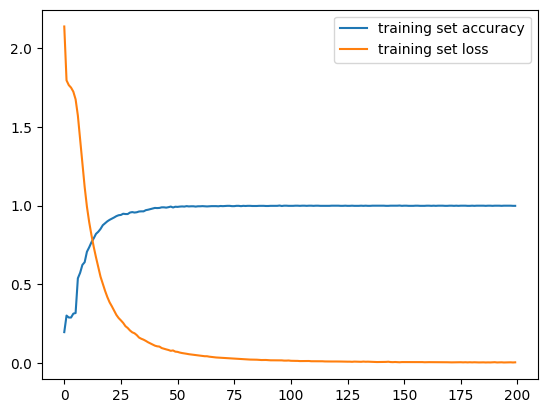

In [18]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [19]:
model.save('mychatbot.h5')

In [21]:
from tensorflow.keras.models import load_model
model1 = load_model('mychatbot.h5')

In [ ]:
joblib.dump(model, 'chatbot_model.pkl')

['chatbot_model.pkl']

In [22]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model1.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Chatbot : ",random.choice(res3[response_tag]))
  if response_tag == "goodbye":
    break

Chatbot :  Coronaviruses are a large family of viruses which may cause illness in animals or humans. COVID-19 is the infectious disease caused by the most recently discovered coronavirus. COVID-19 were unknown before the outbreak began in Wuhan, China, in December 2019. The disease can spread from person to person through small droplets from the nose or mouth which are spread when a person with COVID-19 coughs or exhales. The symptoms of COVID-19 are very similar to symptoms of other illnesses, such as colds and flu. Most people feel better within a few days or weeks of their first COVID-19 symptoms and make a full recovery within 12 weeks. For some people, it can be a more serious illness and their symptoms can last longer.
Chatbot :  Hello! Are you currently having COVID or did you recover from COVID?
Chatbot :  Greetings! As a COVID-19 checker, I am here to provide you with the information and resources you need to stay safe and healthy.
Chatbot :  The symptoms of COVID-19 are very 

KeyboardInterrupt: Interrupted by user